# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import random
from scipy.stats import zscore

# Step 2: Generating Random Data for the Social Media Data

In [7]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Set the number of periods
n = 500

# Set a seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate random data dictionary
data = {
    'Date': pd.date_range('2021-01-01', periods=500),
    'Category': [random.choice(categories) for _ in range(500)],
    'Likes': np.random.randint(0, 10000, size=500)
}


# Step 3: Loading the Data into Pandas and Data Exploration 

In [8]:
# Create a DataFrame
df = pd.DataFrame(data)

# Display the generated data
print(df)


          Date Category  Likes
0   2021-01-01   Travel   7270
1   2021-01-02     Food    860
2   2021-01-03    Music   5390
3   2021-01-04  Fitness   5191
4   2021-01-05  Fitness   5734
..         ...      ...    ...
495 2022-05-11   Travel   1122
496 2022-05-12   Family   4079
497 2022-05-13  Fashion   1571
498 2022-05-14   Health   5073
499 2022-05-15  Fashion   5104

[500 rows x 3 columns]


In [10]:
df.head()

,Date,Category,Likes
0,2021-01-01,Travel,7270
1,2021-01-02,Food,860
2,2021-01-03,Music,5390
3,2021-01-04,Fitness,5191
4,2021-01-05,Fitness,5734


In [13]:
df['Category'].value_counts(normalize=False, sort=True, ascending=False, dropna=True)

Fitness    78
Family     70
Travel     68
Music      62
Food       58
Fashion    57
Health     55
Culture    52
Name: Category, dtype: int64

In [14]:
df.describe()

,Likes
count,500.000000
mean,5079.472000
std,2840.679867
min,4.000000
25%,2732.500000
50%,5234.500000
75%,7429.500000
max,9998.000000


# Step 4: Data Cleaning 

In [15]:
# Drop rows with null values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Likes' to integers
df['Likes'] = df['Likes'].astype(int)

# Display the cleaned DataFrame
print(df)


          Date Category  Likes
0   2021-01-01   Travel   7270
1   2021-01-02     Food    860
2   2021-01-03    Music   5390
3   2021-01-04  Fitness   5191
4   2021-01-05  Fitness   5734
..         ...      ...    ...
495 2022-05-11   Travel   1122
496 2022-05-12   Family   4079
497 2022-05-13  Fashion   1571
498 2022-05-14   Health   5073
499 2022-05-15  Fashion   5104

[500 rows x 3 columns]


# Step 5: Data Visualization 

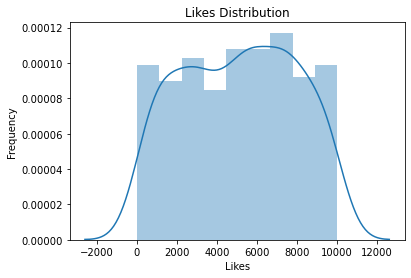

In [16]:
# Visualize the data with a histogram
sns.distplot(df['Likes'])
plt.title('Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()


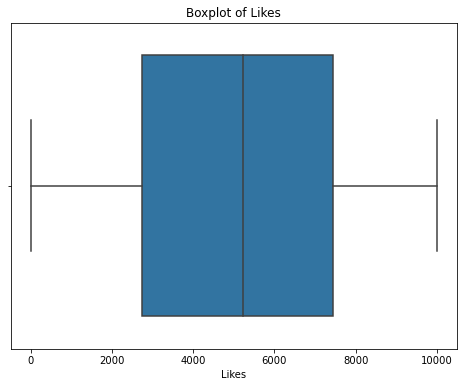

In [23]:
# Create a boxplot for the 'Likes' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Likes'])
plt.title('Boxplot of Likes')
plt.xlabel('Likes')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

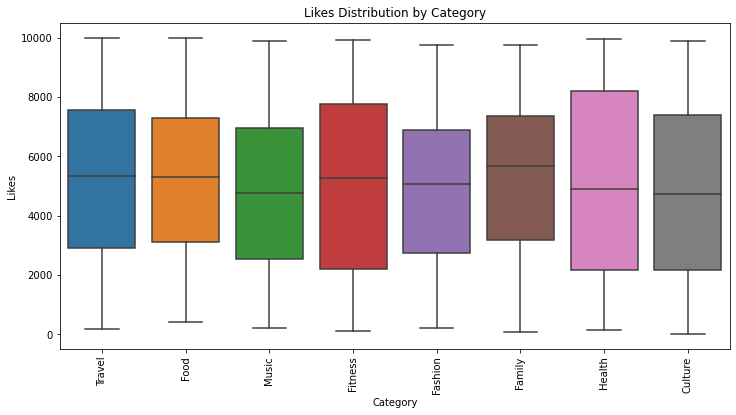

In [22]:
# Create a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes Distribution by Category')
plt.xticks(rotation=90)

In [25]:
# Calculate Z-scores for 'Likes' within each category
df['Z_score'] = df.groupby('Category')['Likes'].transform(zscore)

# Set a Z-score threshold for identifying outliers (e.g., Z_score > 3 or Z_score < -3)
outliers = df[(df['Z_score'] > 3) | (df['Z_score'] < -3)]

# Display the identified outliers
print("Identified Outliers:")
print(outliers)

Identified Outliers:
Empty DataFrame
Columns: [Date, Category, Likes, Year, Z_score]
Index: []


In [18]:
# Print the mean of the 'Likes' category
print(f"Mean Likes: {df['Likes'].mean()}")

Mean Likes: 5079.472


In [19]:
# Print the mean of each Category's 'Likes'
category_likes_mean = df.groupby('Category')['Likes'].mean()
print("\nMean Likes by Category:")
print(category_likes_mean)


Mean Likes by Category:
Category
Culture    4825.961538
Family     5277.957143
Fashion    4939.350877
Fitness    5103.820513
Food       5159.586207
Health     5229.927273
Music      4928.693548
Travel     5105.985294
Name: Likes, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

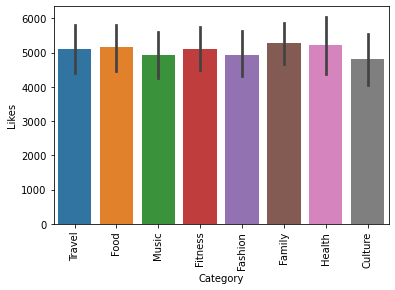

In [20]:
 # plotting means of group
sns.barplot(data=df,y='Likes',x='Category')
plt.xticks(rotation=90)

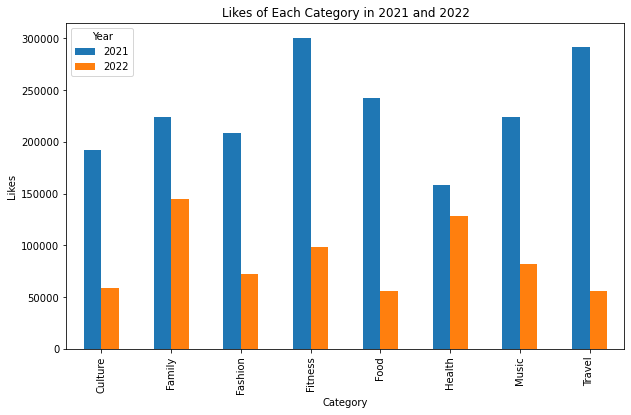

In [21]:
# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Filter data for the years 2021 and 2022
df_2021_2022 = df[df['Year'].isin([2021, 2022])]

# Group by 'Category' and sum the 'Likes' for each category
likes_by_category = df_2021_2022.groupby(['Category', 'Year'])['Likes'].sum().unstack()

# Plot the bar chart
likes_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Likes of Each Category in 2021 and 2022')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.legend(title='Year')
plt.show()


# INSIGHTS and CONCLUSIONS

I appreciate the oppourtunity to present my data visualization project. This project is focused on comapring twitter likes across different categories and in the years 2021 and 2022. Throughout this project, I followed a systematic process to extract insights from the given dataset, utilizing Python programming and Matplotlib library for visualization.

**Data Source**
The dataset used in this project is synthtic and was generated for the purpose of demonstrating data analysis and visualization techniques. Unlike real-world data, this data set does not represent actual user engagement or trends.
The data includes randomly generated values for the 'Date', 'Category', and 'Likes' columns.

**Process Overview**
1. Data Cleaning and Preparation:
   I started with examining the dataset and ensusring the dataset does not contain null values and duplicate rows. I also made      sure to convert the 'Date' Column to the datetime format and the 'Likes' column to an integer.
2. Data Aggregation and Analysis:
   I utilized Seaborn's distribution plot to visualize the distribution of the continous variable 'Likes'. Additionally, I          employed a box plot to check for outliers. Following this, I calculated both the      overall mean of Likes and the mean of Likes within each category. To compare these means across categories, I generated a bar    plot using Seaborn.
   I grouped the 'Category' and 'Year', calculating the sum of 'Likes for each category, then created a bar plot to visualize and compare the Likes for each category in the years 2021 and 2022. 
   
**Key Findings**
1. Likes Distribution:
   The likes distribution exhibits a slight right skewness, as highlighted by the longer right tail in the histogram. This indicates that while the majority of content receives moderate engagement, there are instances of higher engagement, contributing to the extended right tail.
2. Identifying Outliers:
   While exploring potential outliers using boxplots, no clear outliers were observed across categories. 
3. Z-Score Analysis:
   An examination of Z-scores aimed to identify potential outliers within the dataset. Z-scores measure how many standard deviations a data point is from the mean, with values beyond a specified threshold considered potential outliers.
   The Z-score analysis revealed that, according to the chosen threshold (Z > 3 or Z < -3), no outliers were identified in the dataset. This suggests that individual likes values did not significantly deviate from the mean in a manner that would classify them as outliers.
4. Mean Comparison:
   Examining mean likes at the category level unveils intriguing patterns. By comparing each category's mean likes to the overall mean, a nuanced understanding emerges. Categories like 'Family' and 'Health' outperform the overall mean, signaling higher-than-average engagement. In contrast, 'Culture' and 'Music' exhibit slightly lower mean likes.
5. Comparing Both Years (2021 and 2022):
   In the comparison between the two years, a notable trend emerged – the total amount of likes experienced a drastic reduction in 2022. The data suggests that user engagement, as measured by likes, was considerably higher in 2021 than in the subsequent year.
6. Category-Specific Likes in 2021:
   In 2021, 'Travel' and 'Fitness' categories stood out with the highest likes, indicating a robust engagement from the audience.
   Conversely, 'Culture' and 'Health' garnered the lowest likes in 2021, suggesting comparatively lower interest or engagement within these categories.
7. Category-Specific Likes in 2022:
   The dynamics shifted in 2022, with 'Family' and 'Health' claiming the top spots for the highest likes, signaling a change in user preferences or content trends.
   On the contrary, 'Food' and 'Travel' observed the lowest likes in 2022, highlighting a shift in the audience's engagement patterns.
   
**Struggles and Solutions**
1. One challenge was ensuring the 'Date' column was in the correct format. I resolved this by converting it to datetime using the pd.to_datetime function.
2. Properly filtering the data for the years of interest required attention to detail, but by using the isin method, I successfully obtained the desired subset.

**Improvements/Changes**
For future business endeavors, integrating interactive elements into the visualization, such as tooltips or the ability to filter data dynamically, could enhance user engagement and exploration.
Consideration of additional statistical analyses or time series forecasting could provide deeper insights into trends and potential future likes.

In conclusion, this project demonstrates my proficiency in data manipulation, visualization, and communication of insights. I believe my approach sets this portfolio project apart by focusing on simplicity, clarity, and the potential for future enhancements. I am open to feedback and eager to further refine my skills as I continue to engage in data science and analysis projects.